# Finding correlation between each of the model's logits

In [1]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd

In [2]:
gpt_out_path = 'gpt-2_output/'
additional_path = '-model_774M-seed_27'
all_perps_big = pickle.load( gzip.open(gpt_out_path+'all_perplexities_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb'))
all_logits_big = pickle.load( gzip.open(gpt_out_path+'all_logits_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb')) # needed to get the probabilities
text_big = pickle.load( gzip.open(gpt_out_path+'all_text_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb'))
additional_path = ''
all_perps = pickle.load( gzip.open(gpt_out_path+'all_perplexities_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb'))
all_logits = pickle.load( gzip.open(gpt_out_path+'all_logits_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb')) # needed to get the probabilities
text = pickle.load( gzip.open(gpt_out_path+'all_text_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb'))

In [25]:
# applying all analyses to the logits. 

prompt_length = 100
num_batches=4
correlations = []

slicer = 2000

for batch in range(num_batches):
            #for p_ind in range(batch*batch_size, (batch*batch_size)+batch_size ):
    for ind in range(0,all_logits[batch].shape[0]):

        for time_point in range(0,all_logits[0].shape[1]):

            sps = softmax(-np.sort(-all_logits[batch][ind, time_point, :]))[:slicer]
            sps_big = softmax(-np.sort(-all_logits_big[batch][ind, time_point, :]))[:slicer]

            correlations.append(np.corrcoef(sps, sps_big)[0][1])


In [26]:
np.mean(correlations)

0.9670643673297332

(array([1.0000e+00, 3.0000e+00, 6.0000e+00, 1.5000e+01, 4.4000e+01,
        1.1100e+02, 2.1100e+02, 5.3800e+02, 1.7490e+03, 1.1122e+04]),
 array([0.47722293, 0.52950063, 0.58177834, 0.63405605, 0.68633376,
        0.73861146, 0.79088917, 0.84316688, 0.89544459, 0.94772229,
        1.        ]),
 <a list of 10 Patch objects>)

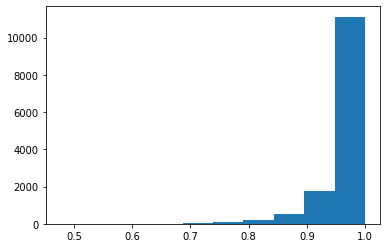

In [27]:
plt.hist(correlations)